Cell 0 — 基本設定

In [ ]:
# 路徑/核心檢查（方便排錯）
from pathlib import Path
import os, sys
print("CWD :", os.getcwd())
print("PY  :", sys.executable)
print("Train:", (Path("../data/raw/train.csv").resolve()))
print("Test :", (Path("../data/raw/test.csv").resolve()))


CWD : d:\practive_w1\notebooks
PY  : d:\practive_w1\.venv\Scripts\python.exe
Train: D:\practive_w1\data\raw\train.csv
Test : D:\practive_w1\data\raw\test.csv


Cell 1 — 匯入與讀檔

In [8]:
import pandas as pd

train = pd.read_csv("../data/raw/train.csv")
test  = pd.read_csv("../data/raw/test.csv")
sub   = pd.read_csv("../data/raw/gender_submission.csv") 

print("Train:", train.shape)
print("Test :", test.shape)
print("sub :", sub.shape)
print("train.Columns:", train.columns.tolist())
print("test.Columns:", test.columns.tolist())
print("sub.Columns:", sub.columns.tolist())

Train: (891, 12)
Test : (418, 11)
sub : (418, 2)
train.Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
test.Columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
sub.Columns: ['PassengerId', 'Survived']


Cell 2 — 初步檢查

In [10]:
# 目標：確定資料能讀、欄位有哪些、大小
print("Train shape:", train.shape)
print("Test  shape:", test.shape)

print("\nTrain 頭 5 列：")
display(train.head())

print("\n欄位名稱：")
print(train.columns.tolist())
print(test.columns.tolist())
print(sub.columns.tolist())

Train shape: (891, 12)
Test  shape: (418, 11)

Train 頭 5 列：


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



欄位名稱：
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Survived']


Cell 3 — 資料結構 & 缺值檢查

In [13]:
# 型態 & 缺值
print("=== dtypes/info ===")
print(train.dtypes)
print("\ninfo():")
print(train.info())

print("\n=== 缺值統計（數量 / 百分比）===")
na_cnt = train.isna().sum().sort_values(ascending=False)
na_pct = (train.isna().mean() * 100).round(2).sort_values(ascending=False)
na_df = pd.DataFrame({"missing_count": na_cnt, "missing_pct": na_pct})
display(na_df)

=== dtypes/info ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null

,missing_count,missing_pct
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00


Cell 4 — 單變數分佈（數值：Age, Fare）

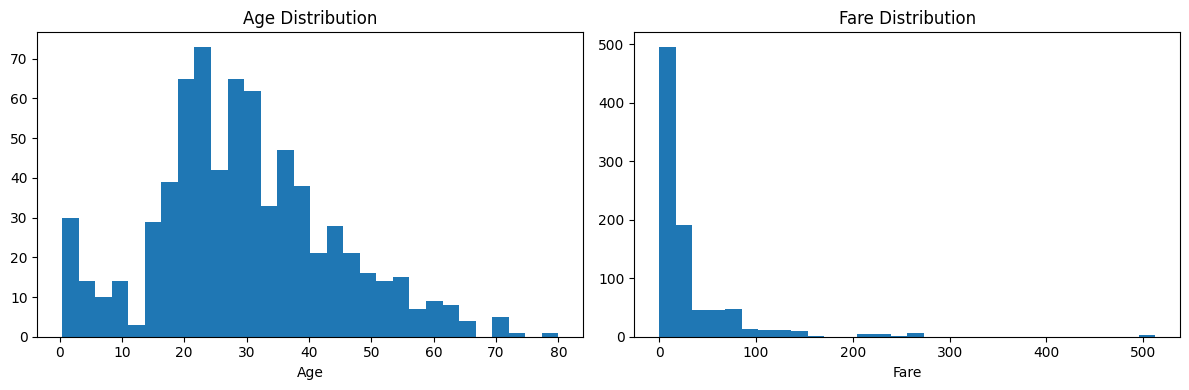

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(train["Age"].dropna(), bins=30)
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")

axes[1].hist(train["Fare"], bins=30)
axes[1].set_title("Fare Distribution")
axes[1].set_xlabel("Fare")

plt.tight_layout()
plt.show()


Cell 5 — 雙變數關聯：性別 vs 生存率、艙等 vs 生存率

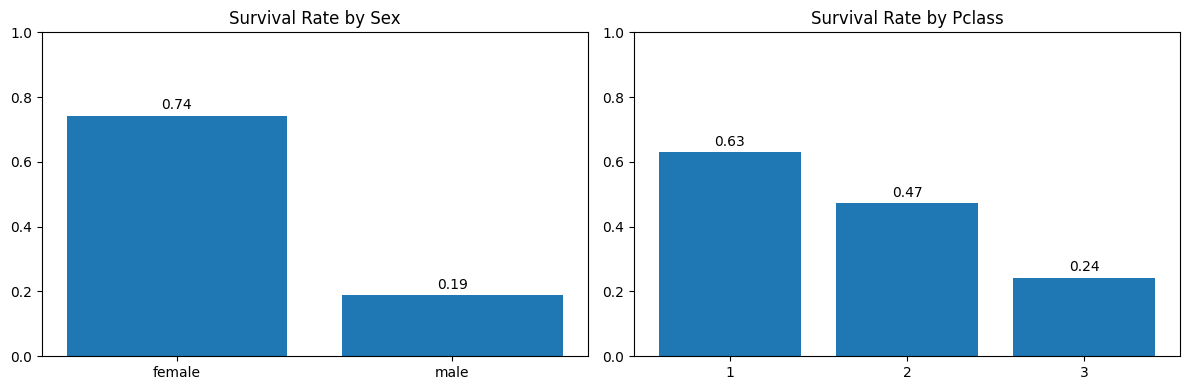

Survival rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 生存率 by Sex
sex_rate = train.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
# 生存率 by Pclass
pclass_rate = train.groupby("Pclass")["Survived"].mean().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(sex_rate.index, sex_rate.values)
axes[0].set_title("Survival Rate by Sex")
axes[0].set_ylim(0, 1)
for x, y in zip(sex_rate.index, sex_rate.values):
    axes[0].text(x, y + 0.02, f"{y:.2f}", ha="center")

axes[1].bar(pclass_rate.index.astype(str), pclass_rate.values)
axes[1].set_title("Survival Rate by Pclass")
axes[1].set_ylim(0, 1)
for x, y in zip(pclass_rate.index.astype(str), pclass_rate.values):
    axes[1].text(x, y + 0.02, f"{y:.2f}", ha="center")

plt.tight_layout()
plt.show()

print("Survival rate by Sex:\n", sex_rate)
print("\nSurvival rate by Pclass:\n", pclass_rate)
